In [1]:
# Import Packages
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [6]:
# Load Data
Avocado = pd.read_csv(r'C:\Users\nikki\OneDrive\Pictures\Data Science\105 Intermediate Statistics\Lesson 4 - ANOVAs\avocados.csv')
Avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Question Set Up
Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTucson?

In [20]:
avocado1 = Avocado[['Total Volume', 'region']]
avocado1.head(5)

,Total Volume,region
0,64236.62,Albany
1,54876.98,Albany
2,118220.22,Albany
3,78992.15,Albany
4,51039.60,Albany
...,...,...
495,243012.20,CincinnatiDayton
496,229363.51,CincinnatiDayton
497,234981.67,CincinnatiDayton
498,222382.69,CincinnatiDayton


In [30]:
region = ['Indianapolis', 'Orlando','PheonixTuscon']
avocado2 = Avocado['region'].isin(region)
avocado3 = Avocado[avocado2].copy()

In [34]:
region = ['Indianapolis', 'Orlando','PheonixTuscon']
avocado2 = avocado1['region'].isin(region)
avocado3 = avocado1[avocado2].copy()

In [35]:
avocado3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 988 to 17984
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Total Volume  676 non-null    float64
 1   region        676 non-null    object 
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


### Total Volume is not an integer

In [36]:
avocado3["Total Volume"] = avocado3["Total Volume"].astype(int)

In [37]:
avocado3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 988 to 17984
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Total Volume  676 non-null    int32 
 1   region        676 non-null    object
dtypes: int32(1), object(1)
memory usage: 13.2+ KB


### Recode Category to a number

In [38]:
def recode (series):
    if series == "Indianapolis": 
        return 0
    if series == "Orlando": 
        return 1
    if series == "PheonixTuscon": 
        return 2

avocado3['regionR'] = avocado3['region'].apply(recode)

In [39]:
avocado3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 988 to 17984
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Total Volume  676 non-null    int32 
 1   region        676 non-null    object
 2   regionR       676 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 18.5+ KB


In [40]:
avocado4 = avocado3[["Total Volume", "regionR"]]

### Test Assumptions

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

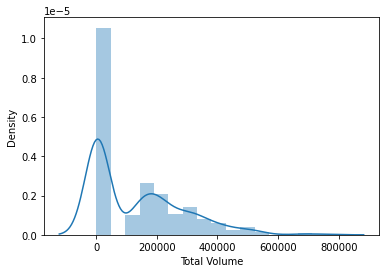

In [41]:
## Normality
sns.distplot(avocado4["Total Volume"])

C:\Python3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total VolumeLOG', ylabel='Density'>

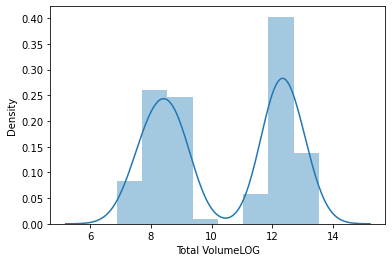

In [43]:
avocado4["Total VolumeLOG"] = np.log(avocado4["Total Volume"])
sns.distplot(avocado4["Total VolumeLOG"])

## Homogeneity of Variance

In [45]:
scipy.stats.bartlett(avocado4["Total VolumeLOG"], avocado4["regionR"])

BartlettResult(statistic=1052.31894692686, pvalue=7.626033589097963e-231)

### Does not meet the assumption of variance. Variance is unequal

# Run the analysis

In [48]:
stats.f_oneway(avocado4["Total VolumeLOG"][avocado4["regionR"] == "0"], 
            avocado4["Total VolumeLOG"][avocado4["regionR"] == "1"],
            avocado4["Total VolumeLOG"][avocado4["regionR"] == "2"])

C:\Python3\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

# Post Hocs

In [50]:
postHoc = MultiComparison(avocado4['Total VolumeLOG'], avocado4['regionR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.4292 0.0067 0.1192 0.7391   True
--------------------------------------------------


## Examine the Means

In [51]:

avocado4.groupby("regionR").mean()

,Total Volume,Total VolumeLOG
regionR,,
0,89536.180473,10.157488
1,173551.840237,10.586681
